In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import ssl
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:

ssl._create_default_https_context = ssl._create_unverified_context

mnist = fetch_openml('mnist_784', parser='auto')


In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

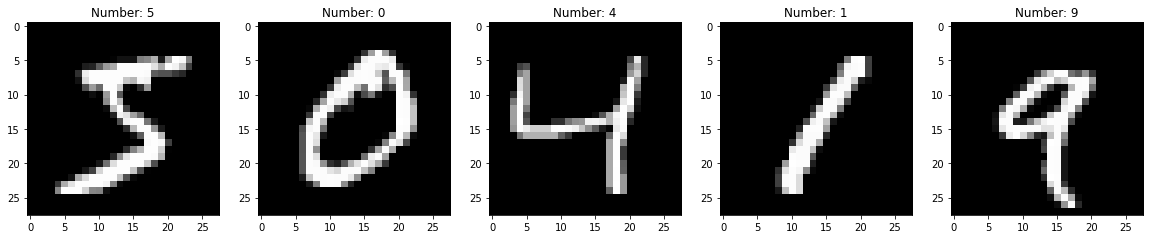

In [4]:
plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(mnist.data.values[:5], mnist.target.values[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image,(28,28)), cmap = "gray")
    plt.title("Number: %s" % label)

In [5]:
X_train, X_test, y_train, y_test, = train_test_split(mnist.data, mnist.target, test_size = 0.2)

In [6]:
mdl = LogisticRegression(solver = 'lbfgs')
mdl.fit(X_train, y_train)
predictions = mdl.predict(X_test)
score = mdl.score(X_test, y_test)
print(score)

0.9157857142857143


In [7]:
mdl.predict([X_test.iloc[0]])[0]

'4'

Prediction: 4


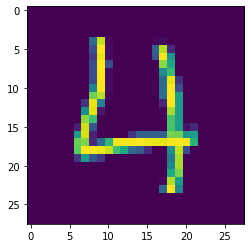

In [8]:
index = 0
plt.imshow(np.reshape(X_test.iloc[index], (28,28)))
print("Prediction: " + mdl.predict([X_test.iloc[index]])[0])

In [9]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1340,    0,    3,    3,    2,    8,   19,    5,    6,    1],
       [   1, 1480,   10,    4,    2,    4,    2,    4,   18,    3],
       [   7,   19, 1255,   31,   22,    3,   19,   11,   27,   11],
       [   7,    6,   35, 1298,    3,   60,    4,   10,   29,    9],
       [   3,    4,   10,    4, 1307,    2,   14,    4,    6,   45],
       [  20,    6,    8,   45,   18, 1097,   24,    6,   34,   13],
       [  13,    5,   15,    1,    8,   18, 1327,    2,    7,    2],
       [   6,    5,   16,    5,   15,    4,    1, 1323,    9,   54],
       [   7,   27,   18,   35,    6,   42,   11,    9, 1168,   13],
       [   9,    9,    2,   23,   35,   12,    0,   49,   12, 1226]],
      dtype=int64)

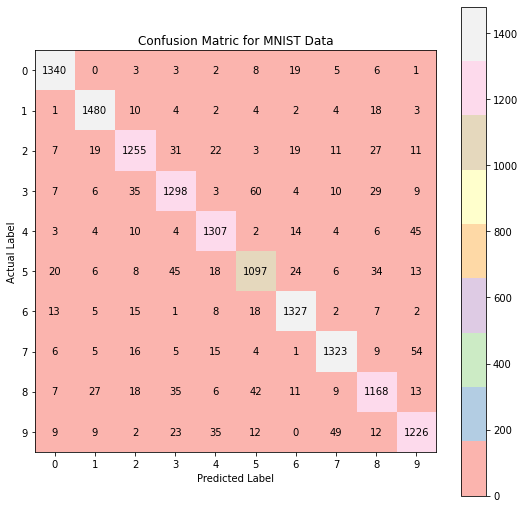

In [10]:
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap = "Pastel1")
plt.title("Confusion Matric for MNIST Data")

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.colorbar()
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy = (y,x), horizontalalignment = 'center', verticalalignment = 'center')